# Getting started with PUDL
This notebook is meant to help you start working with [the data that's loaded into the PUDL database](https://github.com/catalyst-cooperative/pudl#available-data).
If you haven't gotten the database up and running yet, you should work your way through [our getting started guide on GitHub](https://github.com/catalyst-cooperative/pudl/blob/master/docs/getting_started.md) first, and then come back here. We'll assume that you're at least somewhat familiar with the Python programming language and Jupyter Notebooks.

If you're not yet familiar with Jupyter Notebooks, here are a few resources:
 * [A Jupyter Notebook tutorial from DataCamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
 * [An introduction to Jupyter Notebooks from Real Python](https://realpython.com/jupyter-notebook-introduction/)
 * [A gallery of interesting Notebooks from Project Jupyter](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

In [1]:
# Pandas for data analysis:
import pandas as pd

# SQLAlchemy gives us a bunch of database tools:
import sqlalchemy as sa

# Import the top level PUDL package:
import pudl

# Connecting to our databases.
Currently PUDL creates two distinct databases. The FERC Form 1 Database is
a compilation of all the raw Form 1 data that has been released by FERC
since 1994. We use an SQLite database to store this cloned data in the file
`results/sqlite/ferc1.sqlite` within the PUDL repository. If you really
need access to the original FERC Form 1 data, you can create a connection
to the database directly like this:

In [2]:
pudl_settings = pudl.workspace.setup.get_defaults()
pudl_settings

{'pudl_in': '/home/zane/code/catalyst/pudl-test',
 'data_dir': '/home/zane/code/catalyst/pudl-test/data',
 'settings_dir': '/home/zane/code/catalyst/pudl-test/settings',
 'pudl_out': '/home/zane/code/catalyst/pudl-test',
 'sqlite_dir': '/home/zane/code/catalyst/pudl-test/sqlite',
 'parquet_dir': '/home/zane/code/catalyst/pudl-test/parquet',
 'datapackage_dir': '/home/zane/code/catalyst/pudl-test/datapackage',
 'notebook_dir': '/home/zane/code/catalyst/pudl-test/notebook',
 'pudl_db': 'postgresql://catalyst@localhost/pudl',
 'pudl_test_db': 'postgresql://catalyst@localhost/pudl_test',
 'ferc1_db': 'sqlite:////home/zane/code/catalyst/pudl-test/sqlite/ferc1.sqlite'}

In [3]:
ferc1_engine = sa.create_engine(pudl_settings["ferc1_db"])

Then you can use Pandas to pull a particular FERC Form 1 table, or run an arbitrary SQL query on the database, using `pd.read_sql()`  For instance, this will create a dataframe called `f1_fuel_df` containing all of the origingal FERC Form 1 data from the `f1_fuel` table, which contains information about the fuel consumed by large thermal generators, from 1994 to the present.

In [4]:
f1_fuel_df = pd.read_sql_table('f1_fuel', ferc1_engine)

If you want to see a 10-line long random sample of what's in that dataframe..., the `df.sample()` function is here for you:

In [5]:
f1_fuel_df.sample(10)

,respondent_id,report_year,spplmnt_num,row_number,row_seq,row_prvlg,plant_name,fuel,fuel_unit,fuel_quantity,...,fuel_f,fuel_unit_f,fuel_quantity_f,fuel_avg_heat_f,fuel_cost_delvd_f,fuel_cost_burned_f,fuel_cost_btu_f,fuel_cost_kwh_f,fuel_generaton_f,report_prd
4282,150,2017,2,8,8,,WILD HORSE,,,NaN,...,0,0,0,0,0,0,0,0,0,12
4825,403,2017,0,11,11,,,,,NaN,...,0,0,0,0,0,0,0,0,0,12
3962,85,2017,3,3,3,,Shoreham,,,NaN,...,0,0,0,0,0,0,0,0,0,12
4157,44,2017,3,3,3,,Hancock Peaker,,,NaN,...,0,0,0,0,0,0,0,0,0,12
1323,132,2017,1,4,4,,,,,NaN,...,0,0,0,0,0,0,0,0,0,12
4728,517,2017,0,4,4,,,,,NaN,...,0,0,0,0,0,0,0,0,0,12
2643,194,2017,0,4,4,,Columbia 2 (All),Coal,Tons,2137519.0,...,0,0,0,0,0,0,0,0,0,12
5572,155,2017,0,8,8,,Desert Star,,,NaN,...,0,0,0,0,0,0,0,0,0,12
3211,147,2017,0,2,2,,San Juan,Oil,Barrels,34024.0,...,0,0,0,0,0,0,0,0,0,12
2593,281,2017,1,14,14,,Grinnell,,,NaN,...,0,0,0,0,0,0,0,0,0,12


However, there are a bunch of "footnote" reference columns that end with `_f` which aren't particularly useful here. To drop them from the dataframe and look at a different sample of the remaining dataframe we can do:

In [6]:
f1_fuel_df = f1_fuel_df.drop(f1_fuel_df.filter(like='_f').columns, axis=1)
f1_fuel_df.sample(10)

,respondent_id,report_year,spplmnt_num,row_number,row_seq,row_prvlg,plant_name,fuel,fuel_unit,fuel_quantity,fuel_avg_heat,fuel_cost_delvd,fuel_cost_burned,fuel_cost_btu,fuel_cost_kwh,fuel_generaton,report_prd
2293,6,2017,0,14,14,,Dresden,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
4015,19,2017,0,11,11,,,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
5710,57,2017,8,11,11,,,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
1930,453,2017,0,11,11,,,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
3574,195,2017,0,5,5,,Pulliam 6,Oil,Barrels,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
707,176,2017,1,3,3,,Four Corners,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
237,22,2017,1,13,13,,,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
3439,42,2017,0,5,5,,F. M. Tait,,,NaN,NaN,0.0,0.0,0.0,3.952,12459.0,12
5441,80,2017,2,12,12,,,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12
3875,119,2017,7,6,6,,RM Schahfer,,,NaN,NaN,0.0,0.0,0.0,0.000,0.0,12


### FERC Form 1, but from PUDL
But that's just the FERC Form 1 DB... and it's a mess.  To connect to the PUDL database, which includes a cleaned up subset of the FERC Form 1 data, as well as data from the EIA 860 and EIA 923, we can do something similar, to access the same data, but in an easier to use form. Note that the fuel types have been standardized, several derived columns are now gone, and the column names are more informative.

In [7]:
pudl_engine = sa.create_engine(pudl_settings["pudl_db"])
# Dropping the 'id' column which contains autoincremented surrogate primary key
fuel_ferc1_df = pd.read_sql('fuel_ferc1', pudl_engine).drop('id', axis=1)
fuel_ferc1_df.sample(10)

,record_id,utility_id_ferc1,report_year,plant_name,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
39,f1_fuel_2017_88_0_7,88,2017,cane run ct,gas,mcf,1835.0,1.010000,181.596,181.596,1.79769
674,f1_fuel_2017_193_1_5,193,2017,pt washington-total,gas,mcf,33028837.0,1.010000,3.612,3.612,3.21284
270,f1_fuel_2017_95_0_11,95,2017,big stone,oil,bbl,886.0,5.880000,69.552,71.845,11.82600
446,f1_fuel_2017_134_3_4,134,2017,chehalis,gas,mcf,12249130.0,1.094000,4.253,4.253,3.88700
699,f1_fuel_2017_294_0_7,294,2017,prairie state,coal,ton,301386.0,16.832000,21.970,21.970,1.29000
707,f1_fuel_2017_79_0_10,79,2017,hawthorn 7 & 8,gas,mcf,389958.0,1.010000,6.954,6.954,6.88400
658,f1_fuel_2017_195_2_14,195,2017,edgewater 4,oil,bbl,3436.0,5.796000,71.800,0.000,12.39000
57,f1_fuel_2017_186_1_10,186,2017,gravel neck,oil,bbl,25308.0,5.777814,99.210,65.870,16.87000
182,f1_fuel_2017_145_2_3,145,2017,fort lupton,oil,bbl,207.0,5.775504,83.360,83.360,14.43000
23,f1_fuel_2017_22_1_2,22,2017,madison unit 3,coal,ton,1074204.0,28.323337,78.761,57.540,2.78100


### Selecting data with an SQL query
Of course, we can also pull other data. Here we'll data from the EIA 923 Fuel Receipts and Costs table into a dataframe, using an SQL query rather than pulling the table directly. Let's limit it to coal records from January 2014 or later.

In [8]:
frc_eia923 = pd.read_sql(
    """SELECT * FROM fuel_receipts_costs_eia923
       WHERE fuel_type_code_pudl='coal'""", pudl_engine)
frc_eia923.sample(10)

,id,plant_id_eia,report_date,contract_type_code,contract_expiration_date,energy_source_code,fuel_type_code_pudl,fuel_group_code,fuel_group_code_simple,mine_id_pudl,...,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,primary_transportation_mode_code,secondary_transportation_mode_code,natural_gas_transport_code,natural_gas_delivery_contract_type_code,moisture_content_pct,chlorine_content_ppm
11163,41544,2828,2017-12-01,C,2018-01-01,BIT,coal,coal,coal,56.0,...,3.86,9.08,0.000,NaN,RV,None,None,None,6.67,0.0
4660,16660,6257,2017-05-01,C,2017-12-01,SUB,coal,coal,coal,15.0,...,0.36,5.30,0.000,2.248,RR,None,None,None,29.80,0.0
11815,44209,56456,2017-12-01,C,2017-12-01,SUB,coal,coal,coal,24.0,...,0.20,4.50,0.000,NaN,RR,None,None,None,27.43,0.0
3685,13087,6179,2017-04-01,C,2017-12-01,SUB,coal,coal,coal,11.0,...,0.38,5.90,0.063,1.766,RR,None,None,None,30.91,40.0
8308,30829,3122,2017-09-01,C,2017-09-01,BIT,coal,coal,coal,116.0,...,1.66,13.10,0.285,NaN,TR,None,None,None,6.55,1200.0
294,911,2712,2017-01-01,C,2018-12-01,BIT,coal,coal,coal,16.0,...,2.24,7.80,0.000,2.940,RR,None,None,None,6.78,0.0
8348,30942,3470,2017-09-01,C,2017-12-01,SUB,coal,coal,coal,26.0,...,0.29,4.60,0.000,NaN,RR,None,None,None,29.51,0.0
10773,39658,10603,2017-11-01,C,2017-12-01,WC,coal,coal,coal,246.0,...,1.62,32.70,0.000,NaN,TR,None,None,None,15.05,0.0
6406,23889,4143,2017-07-01,C,2017-12-01,SUB,coal,coal,coal,24.0,...,0.24,4.30,0.000,2.676,RR,RV,None,None,26.44,0.0
2806,9571,6664,2017-03-01,C,2018-12-01,SUB,coal,coal,coal,24.0,...,0.33,4.60,0.000,1.926,RR,None,None,None,27.10,0.0


### Using a tabular output object
The normalized database tables are great, but we've also created some routines to compile dataframes that are a little more human friendly. For instance, by including the names of the various plants and utilities referenced, rather than just their unique IDs. These routines are bundled together into tabular output objects, defined by the `pudl.output.pudltabl.PudlTabl` class. These objects can also aggregate the data appropriately at different time resolutions. This example creates an output object with all available data, at monthly resolution:

In [9]:
pudl_out = pudl.output.pudltabl.PudlTabl(pudl_engine, freq='MS')

Now that we have the object, we can ask it for some data, say about per-generator net generation:

In [10]:
gen_eia923 = pudl_out.gen_eia923()

In [11]:
gen_eia923.sample(10)

,report_date,plant_id_eia,plant_id_pudl,plant_name,utility_id_eia,utility_id_pudl,utility_name,generator_id,net_generation_mwh
455,2017-12-01,116,464,Ocotillo,803,31,Arizona Public Service Co,1,14047.00
21215,2017-12-01,10397,3242,ArcelorMittal Indiana Harbor West,56165,520,ArcelorMittal Indiana Harbor West,GEN7,425.83
12967,2017-08-01,3576,2372,Ray Olinger,6958,1004,City of Garland - (TX),2,229.00
26406,2017-07-01,50406,3654,Somerset Plant,16190,3099,Sappi Fine Paper North America-Somerset,GEN1,21332.00
39199,2017-08-01,55400,4564,Elk Hills Power LLC,34164,1608,Elk Hills Power LLC,STG,134608.00
45753,2017-10-01,58193,6361,Bonanza BioEnergy LLC,58166,670,Bonanza BioEnergy LLC,ST96,317.00
35965,2017-02-01,55173,10,Acadia Energy Center,3265,69,Cleco Power LLC,CT25,3219.00
2625,2017-10-01,617,458,Port Everglades,6452,121,Florida Power & Light Co,5A,106136.00
28105,2017-02-01,50743,3797,Starrett City Cogen Facility,18020,3291,Starrett City Inc,GEN2,2500.66
248,2017-09-01,26,175,E C Gaston,195,18,Alabama Power Co,5,-1925.00


### Requesting derived values from output objects
The output objects also know how to use the available data to calculate some interesting things, on a whole-dataset basis. For example, the per-generator marginal fuel costs, heat rates, and capacity factors... This can take a couple of minutes.

In [12]:
mcoe_df = pudl_out.mcoe()

/home/zane/miniconda3/envs/pudl-test/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### Plotting from the dataframe
Now that we've got some interesting analysis stored in a dataframe, we should make a few visualizations so we can see what's going on.

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [14]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,4)
mpl.rcParams['figure.dpi'] = 150

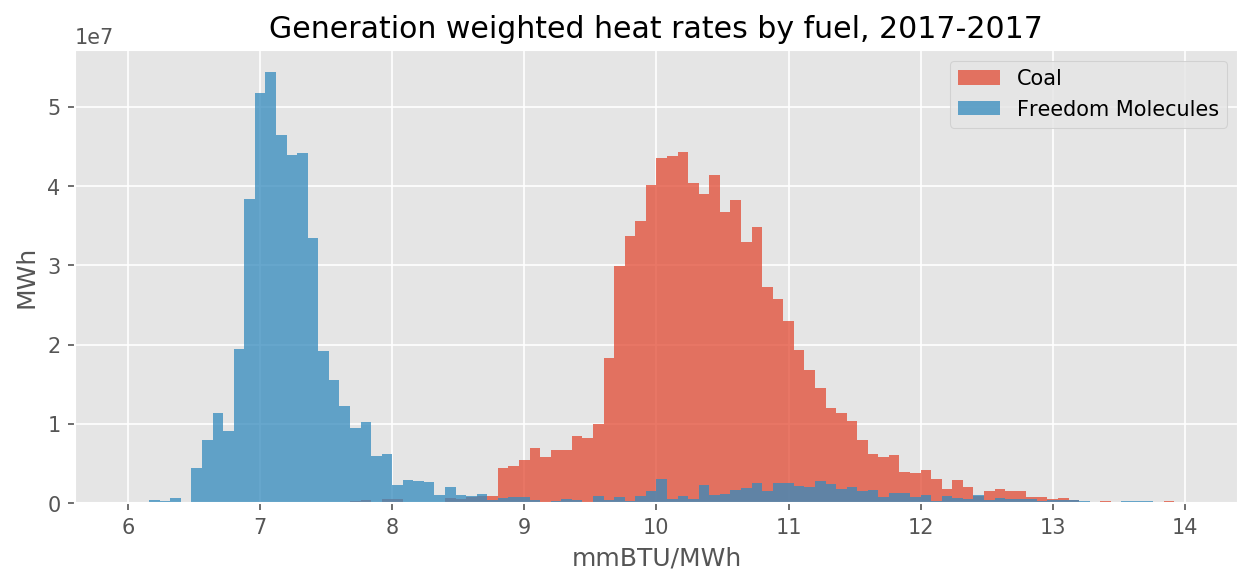

In [15]:
coal_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='coal']
gas_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='gas']
start_year = min(mcoe_df.report_date.dt.year)
end_year = max(mcoe_df.report_date.dt.year)
plt.hist(coal_mcoe.heat_rate_mmbtu_mwh,
         weights=coal_mcoe.net_generation_mwh,
         range=(6,14), bins=100,
         label='Coal', alpha=0.75)
plt.hist(gas_mcoe.heat_rate_mmbtu_mwh,
         weights=gas_mcoe.net_generation_mwh,
         range=(6,14), bins=100,
         label='Freedom Molecules', alpha=0.75)
plt.xlabel('mmBTU/MWh')
plt.ylabel('MWh')
plt.title(f"Generation weighted heat rates by fuel, {start_year}-{end_year}")
plt.legend();

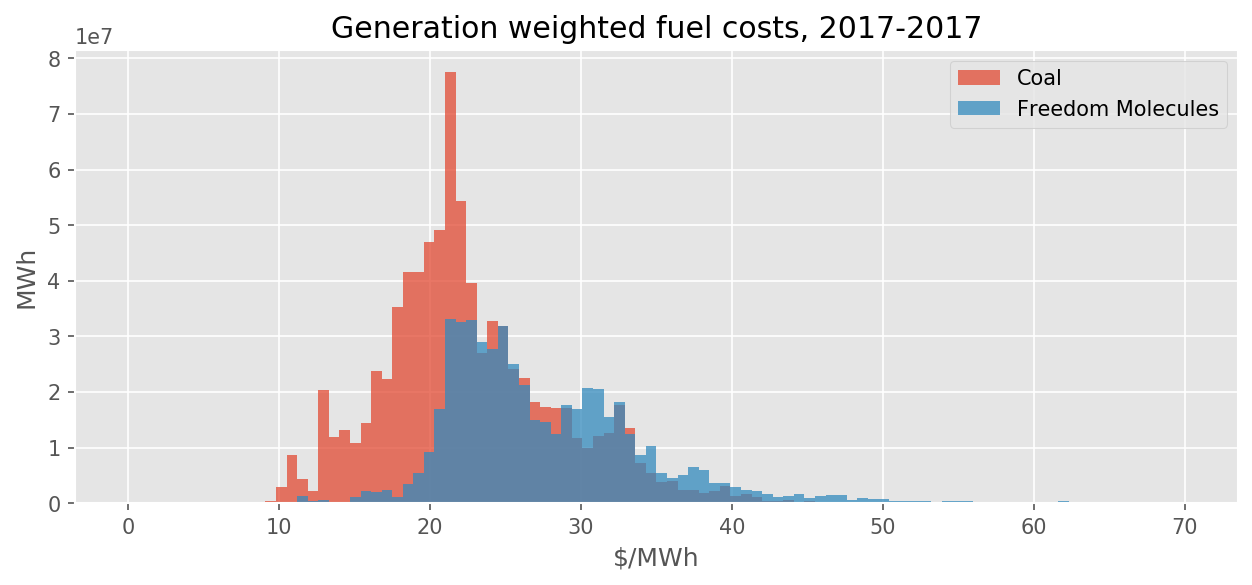

In [16]:
coal_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='coal']
gas_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='gas']
start_year = min(mcoe_df.report_date.dt.year)
end_year = max(mcoe_df.report_date.dt.year)
plt.hist(coal_mcoe.fuel_cost_per_mwh,
         weights=coal_mcoe.net_generation_mwh,
         range=(0,70), bins=100,
         label='Coal', alpha=0.75)
plt.hist(gas_mcoe.fuel_cost_per_mwh,
         weights=gas_mcoe.net_generation_mwh,
         range=(0,70), bins=100,
         label='Freedom Molecules', alpha=0.75)
plt.xlabel('$/MWh')
plt.ylabel('MWh')
plt.title(f"Generation weighted fuel costs, {start_year}-{end_year}")
plt.legend();

## Other notebooks to play with:
Any Jupyter Notebook that's deployed into the `notebooks` directory in your PUDL workspace should work, because they are tested automatically by PyTest before we do a release.